# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [81]:
HouseDF = pd.read_csv('USA_Housing.csv')



In [83]:
# Data Encoding
from sklearn.preprocessing import LabelEncoder


categorical_columns = HouseDF.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


label_encoder = LabelEncoder()
for col in categorical_columns:
    HouseDF[f'{col}_encoded'] = label_encoder.fit_transform(HouseDF[col])


print("\nEncoded Data:")
print(HouseDF[[f'{col}_encoded' for col in categorical_columns]].head())

Categorical columns: Index(['Address'], dtype='object')

Encoded Data:
   Address_encoded
0              962
1              863
2             4069
3             4794
4             4736


In [85]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Address_encoded
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...",962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ...",863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064...",4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386,4736


In [87]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   Address_encoded               5000 non-null   int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 293.1+ KB


In [89]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,2499.500000
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,1443.520003
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.000000
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,1249.750000
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,2499.500000
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,3749.250000
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,4999.000000


In [90]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'Address_encoded'],
      dtype='object')

## Exploratory Data Analysis for House Price Prediction

In [94]:
sns.pairplot(HouseDF)

## Training a Linear Regression Model

### X and y List

In [98]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

### Split Data into Train, Test

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the LinearRegression Model

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lm = LinearRegression()

In [105]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [107]:
print(lm.intercept_)

-2640159.7968519093


In [108]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions from our Linear Regression Model

In [147]:
predictions = lm.predict(X_test)
print (predictions)

[1260960.70567626  827588.75560352 1742421.24254328 ...  372191.40626952
 1365217.15140895 1914519.54178824]


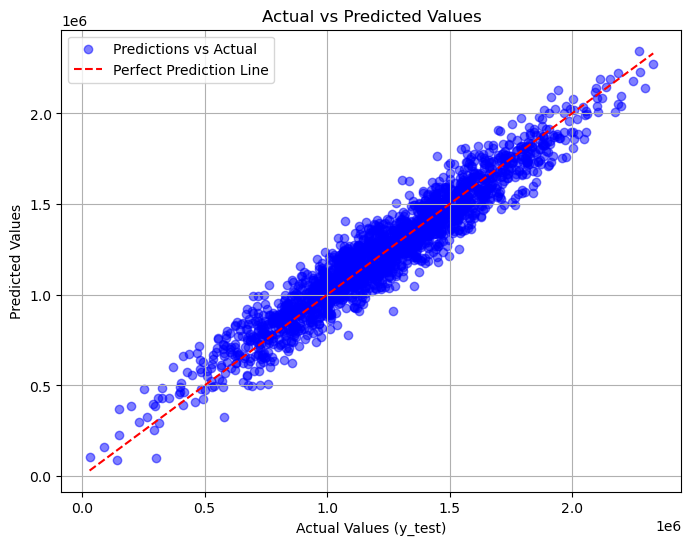

In [167]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))  # Set figure size for better visibility
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')  
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914954
MSE: 10460958907.2095
RMSE: 102278.82922291152


In [143]:
#prepare function
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def prepare():
   
    HouseDF = pd.read_csv('USA_Housing.csv')
    
    
    categorical_columns = HouseDF.select_dtypes(include=['object']).columns
    print("Categorical columns:", categorical_columns)
    
    
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        HouseDF[f'{col}_encoded'] = label_encoder.fit_transform(HouseDF[col])
    
    
    return HouseDF

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#train function
def train(HouseDF):
    X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

    y = HouseDF['Price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)


    return X_train,y_train

In [169]:
#test function
def test(X_train,y_train):
    predictions = lm.predict(X_test)
    print (predictions)


   

In [171]:
import matplotlib.pyplot as plt

#evaluation function
def evaluate(y_test, predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    # Create scatter plot
    plt.figure(figsize=(8, 6))  # Set figure size for better visibility
    plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predictions vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')  
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()
        
        